In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import GenericUnivariateSelect, chi2


from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [42]:
# some feature selection using GenericUnivariateSelect

df = pd.read_csv('data.csv')

In [43]:
X = df.drop(['diabetes'], axis=1)
y = df['diabetes']

In [44]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)


In [51]:
transformer = GenericUnivariateSelect(chi2, mode='k_best', param=12)

X_new = transformer.fit_transform(X, y)
X_new.shape

(96128, 12)

In [52]:
ovs = SMOTE()

bal_X, bal_y = ovs.fit_resample(X_new,y)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(bal_X, bal_y, train_size=0.5, random_state=42)

In [56]:
knn = KNeighborsClassifier(n_neighbors=4)

model = knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'the accuracy of the model is {accuracy.round(4)*100}%')
print(classification_report(y_test, y_pred))

the accuracy of the model is 94.41000000000001%
              precision    recall  f1-score   support

           0       0.96      0.93      0.94     43790
           1       0.93      0.96      0.95     43856

    accuracy                           0.94     87646
   macro avg       0.94      0.94      0.94     87646
weighted avg       0.94      0.94      0.94     87646



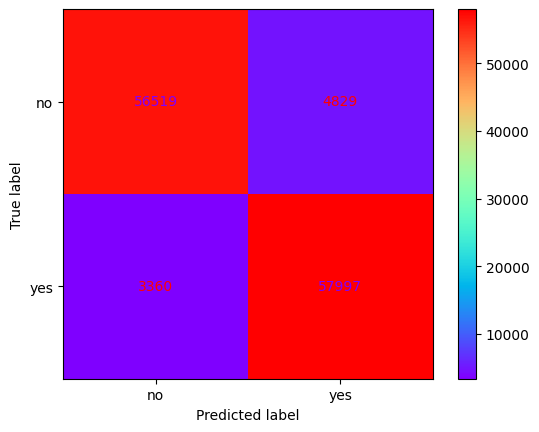

In [49]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no', 'yes']).plot(cmap='rainbow')